## Applied Statistics

### Turma 9DTSR

### Trabalho prático usando Python
 
 
### Clusters Analysis usando o algoritmo k-means  

#### Objetivo: Separar um conjunto de objetos/clientes em grupos (clusters) de forma que os membros de qualquer grupo formado sejam os mais homogêneos possíveis com relação a algum critério, como por exemplo a distância euclidiana.



#### Procedimento:

#### (1) Selecionar  somente variáveis quantitativas (p).
#### (2) Análise exploratória dos dados. 
#### (3) Avaliar a presença de outliers e pontos extremos. 
#### (4) Padronizar as variáveis antes de se calcular as distâncias, assim, as "p" variáveis serão igualmente importantes. Geralmente, a padronização feita é para que todas as variáveis (quantitativas) tenham média zero e variância 1.





In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
# Importar a base de dados Recência, Frequência e Valor (RFV)
BaseRFV = pd.read_excel('BaseRFV.xlsx')

In [3]:
BaseRFV.head()

,id_cliente,compras,recencia,valor
0,1,4,4.9,172.37
1,2,2,11.0,172.37
2,3,4,4.7,157.17
3,4,1,10.2,158.14
4,5,3,8.9,172.61


In [4]:
BaseRFV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9878 entries, 0 to 9877
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  9878 non-null   int64  
 1   compras     9878 non-null   int64  
 2   recencia    9878 non-null   float64
 3   valor       9878 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 308.8 KB


## Análise exploratória dos dados

- Utilize o Box Plot para detecção de outliers e pontos extremos
- Gráfico de dispersão para identificar correlação entre as variáveis

In [5]:
BaseRFV.describe().round(2)

,id_cliente,compras,recencia,valor
count,9878.00,9878.00,9878.00,9878.00
mean,4939.50,2.58,7.71,250.75
std,2851.68,1.81,2.21,126.34
min,1.00,1.00,1.00,60.86
25%,2470.25,1.00,6.30,157.96
50%,4939.50,2.00,7.75,231.70
75%,7408.75,3.00,9.50,305.75
max,9878.00,10.00,12.00,641.10


In [6]:
dados= BaseRFV.drop(columns=['id_cliente'])

In [7]:
# Selecionar as variáveis quantitativas
var_num = ['valor','compras','recencia']

In [8]:
df = dados[var_num].copy()

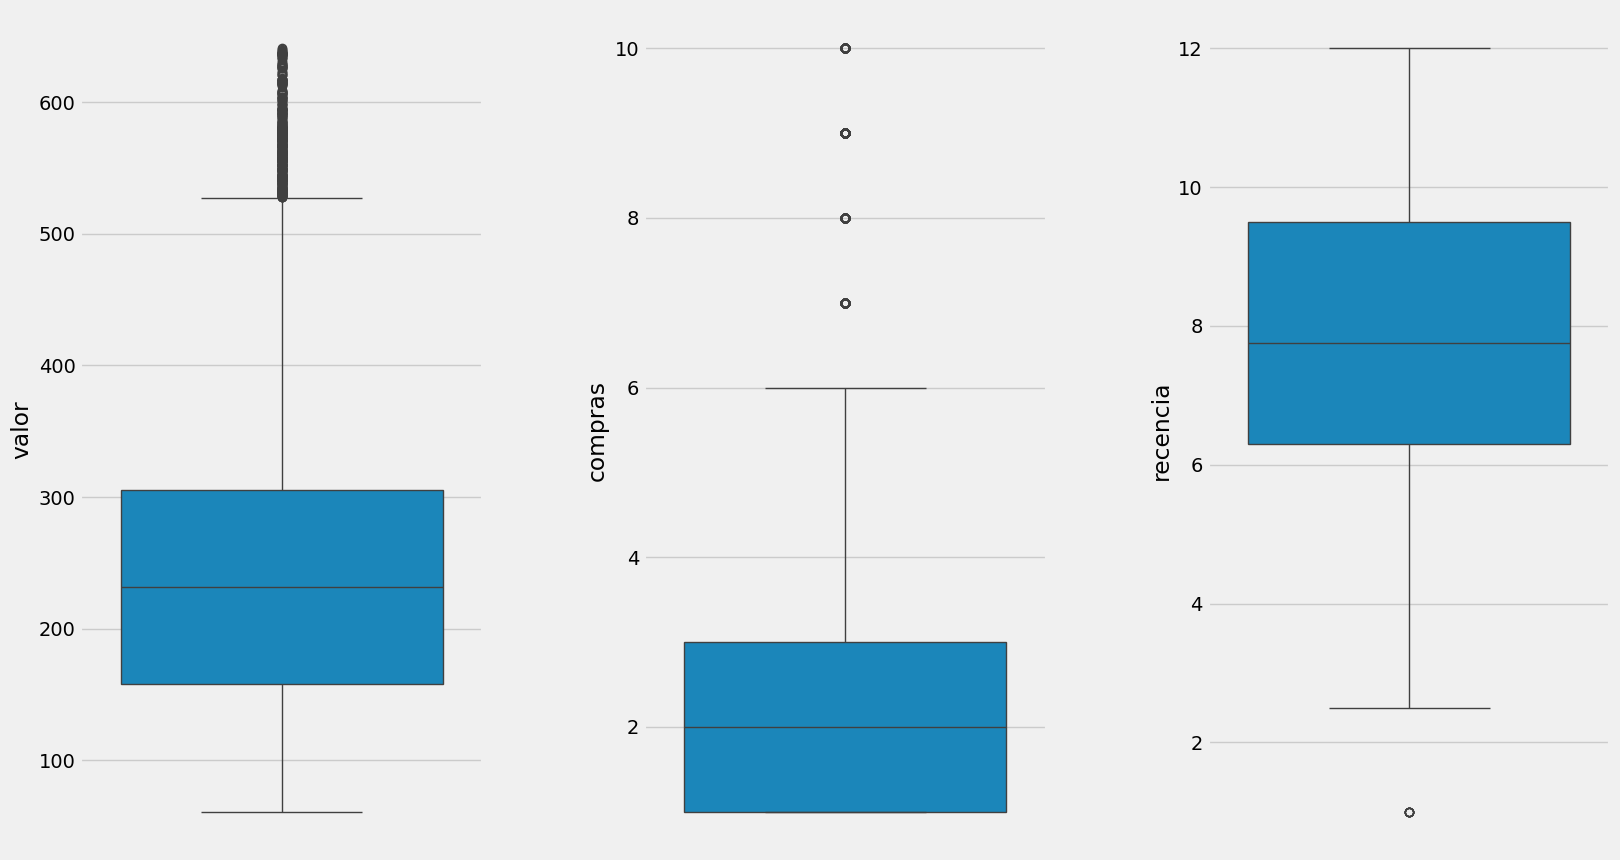

In [32]:
# Análise exploratória dos dados usando o gráfico Box Plot
features = var_num
fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=dados.loc[:, col]
    sns.boxplot(x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

plt.show()

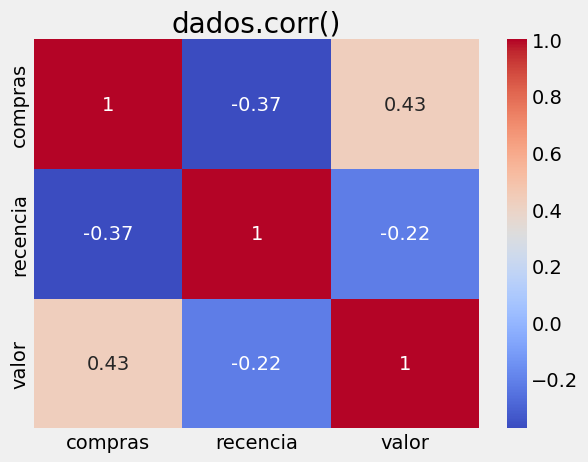

In [33]:
sns.heatmap(dados.corr(),cmap='coolwarm',annot=True)
plt.title('dados.corr()')
plt.show()

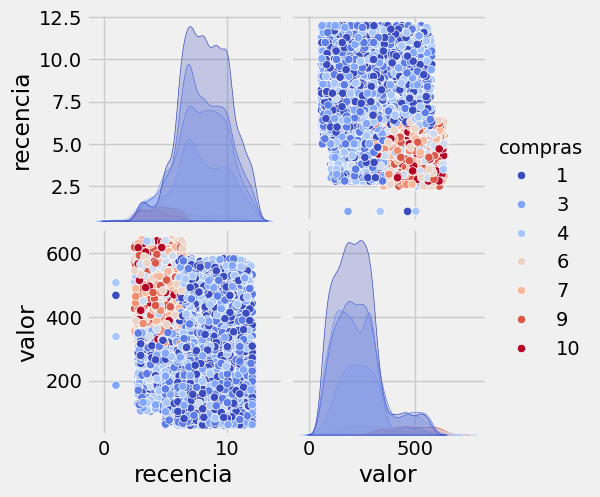

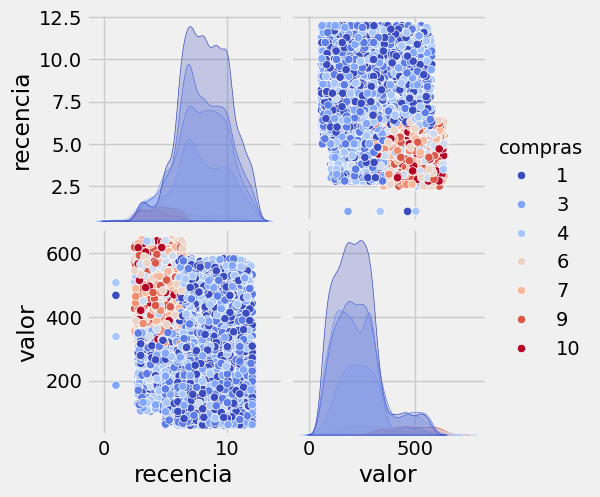

In [35]:
sns.pairplot(dados,hue='compras',palette='coolwarm')
plt.show()

### Normalizar os dados

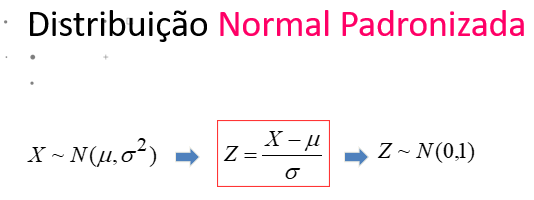




In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# padronizar a variável para Normal com média igual a zero e desvio padrão igual a 1
scaler = StandardScaler()
dados_padrao= scaler.fit_transform(dados)

In [14]:
pd.DataFrame(dados_padrao).describe().round(2)

,0,1,2
count,9878.00,9878.00,9878.00
mean,-0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-0.87,-3.04,-1.50
25%,-0.87,-0.64,-0.73
50%,-0.32,0.02,-0.15
75%,0.23,0.81,0.44
max,4.09,1.94,3.09


### Análise de cluster

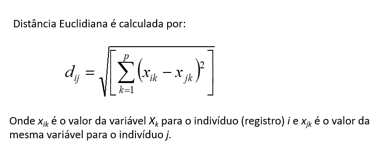

In [36]:
# Elbow method (clustering)
# Encontrar o número de clusters

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dados_padrao)
    sse.append(kmeans.inertia_)

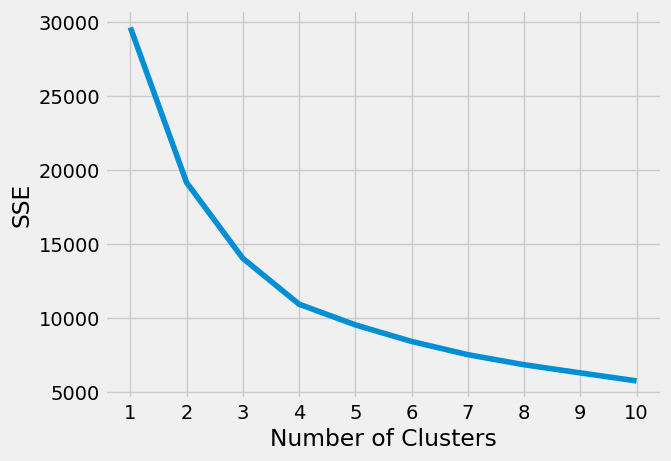

In [37]:
# Gráfico Sum of Squared errors vs number of clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

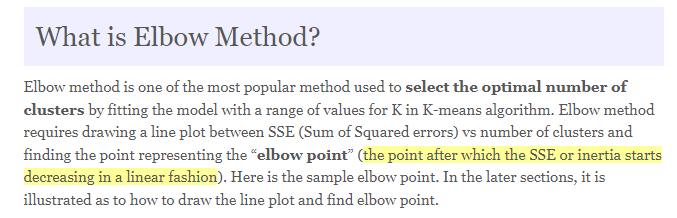

In [43]:
# Hiperparâmetro do KMeans é o número de cluster (n_clusters)
model = KMeans(n_clusters = 4, random_state=0)
clusters = model.fit_predict(dados_padrao)
Counter(clusters.tolist())

Counter({0: 4144, 3: 3713, 2: 1252, 1: 769})

In [42]:
# Quantidade de observações em cada cluster
Counter(clusters.tolist())

Counter({0: 4144, 3: 3713, 2: 1252, 1: 769})

In [44]:
# Centro do Cluster
model.cluster_centers_

array([[-0.30316925,  0.82702548, -0.45524129],
       [ 2.62031633, -1.48430733,  1.78274584],
       [-0.09335931,  0.32454836,  1.42645141],
       [-0.17298189, -0.72674483, -0.34499259]])

In [20]:
# Classificar o cliente em um dos cluster
# 1) calcular a distância euclidiana para cada cluster utilizando o centro de cada cluster
# 2) o cluster do cliente será aquele com a menor distância calculada em 1)


In [45]:
# Hiperparâmetro do KMeans é o número de cluster (n_clusters)
model4 = KMeans(n_clusters = 4, n_init=25, max_iter = 600, random_state=0)
clusters4 = model4.fit_predict(dados_padrao)

In [46]:
# Quantidade de observações em cada cluster
Counter(clusters4.tolist())

Counter({2: 4179, 1: 3754, 0: 1174, 3: 771})

In [47]:
# Quantidade de observações em cada cluster
Counter(clusters4.tolist())

Counter({2: 4179, 1: 3754, 0: 1174, 3: 771})

In [48]:
# Centro do Cluster
model4.cluster_centers_

array([[-0.10517126,  0.33120958,  1.49105378],
       [-0.16739896, -0.7189702 , -0.33606178],
       [-0.30292812,  0.82661574, -0.44543562],
       [ 2.61697516, -1.48211086,  1.78008413]])

In [49]:
df.head()

,valor,compras,recencia
0,172.37,4,4.9
1,172.37,2,11.0
2,157.17,4,4.7
3,158.14,1,10.2
4,172.61,3,8.9


In [26]:
df.describe().round(2)

,valor,compras,recencia
count,9878.00,9878.00,9878.00
mean,250.75,2.58,7.71
std,126.34,1.81,2.21
min,60.86,1.00,1.00
25%,157.96,1.00,6.30
50%,231.70,2.00,7.75
75%,305.75,3.00,9.50
max,641.10,10.00,12.00


In [50]:
# Preencher as médias e desvio padrões das variáveis
media_compras = 2.58
dp_compras = 1.81
media_recencia = 7.71
dp_recencia = 2.21
media_valor = 250.75
dp_valor = 126.34

In [51]:
BaseRFV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9878 entries, 0 to 9877
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  9878 non-null   int64  
 1   compras     9878 non-null   int64  
 2   recencia    9878 non-null   float64
 3   valor       9878 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 308.8 KB


In [52]:
# criar a variável padronizada na escala da Normal(0,1)
BaseRFV['zcompras'] = (BaseRFV['compras'] - 2.58)/1.81
BaseRFV['zrecencia'] = (BaseRFV['recencia'] - 7.71)/2.21
BaseRFV['zvalor'] = (BaseRFV['valor'] - 250.75)/126.34

In [53]:
BaseRFV.head()

,id_cliente,compras,recencia,valor,zcompras,zrecencia,zvalor
0,1,4,4.9,172.37,0.784530,-1.271493,-0.620389
1,2,2,11.0,172.37,-0.320442,1.488688,-0.620389
2,3,4,4.7,157.17,0.784530,-1.361991,-0.740700
3,4,1,10.2,158.14,-0.872928,1.126697,-0.733022
4,5,3,8.9,172.61,0.232044,0.538462,-0.618490


In [54]:
# Calcular a distância de cada cliente em relação a cada cluster**1/
BaseRFV['d1'] = (((BaseRFV['zcompras'] -0.16653668)**2) + ((BaseRFV['zrecencia'] -0.71820336)**2) + ((BaseRFV['zvalor'] -0.33487344)**2))**1/2
BaseRFV['d2'] = (((BaseRFV['zcompras'] +2.61697516)**2) + ((BaseRFV['zrecencia'] -1.48211086)**2) + ((BaseRFV['zvalor'] +1.78008413)**2))**1/2
BaseRFV['d3'] = (((BaseRFV['zcompras'] -0.10639672)**2) + ((BaseRFV['zrecencia'] + 0.33263349)**2) + ((BaseRFV['zvalor'] +1.491835)**2))**1/2
BaseRFV['d4'] = (((BaseRFV['zcompras'] -0.30344266)**2) + ((BaseRFV['zrecencia'] + 0.82688739)**2) + ((BaseRFV['zvalor'] -0.446366)**2))**1/2


In [56]:
BaseRFV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9878 entries, 0 to 9877
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  9878 non-null   int64  
 1   compras     9878 non-null   int64  
 2   recencia    9878 non-null   float64
 3   valor       9878 non-null   float64
 4   zcompras    9878 non-null   float64
 5   zrecencia   9878 non-null   float64
 6   zvalor      9878 non-null   float64
 7   d1          9878 non-null   float64
 8   d2          9878 non-null   float64
 9   d3          9878 non-null   float64
 10  d4          9878 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 849.0 KB


In [59]:
BaseRFV.head(15)

,id_cliente,compras,recencia,valor,zcompras,zrecencia,zvalor,d1,d2,d3,d4,menor_dist
0,1,4,4.9,172.37,0.784530,-1.271493,-0.620389,2.626668,10.248734,1.050370,0.783543,0.783543
1,2,2,11.0,172.37,-0.320442,1.488688,-0.620389,0.871661,3.309500,2.129410,3.444544,0.871661
2,3,4,4.7,157.17,0.784530,-1.361991,-0.740700,2.932991,10.369738,1.041823,0.963453,0.963453
3,4,1,10.2,158.14,-0.872928,1.126697,-0.733022,1.193877,2.132179,1.832260,3.295648,1.193877
4,5,3,8.9,172.61,0.232044,0.538462,-0.618490,0.472750,5.178343,0.768663,1.501597,0.472750
5,6,1,12.0,311.14,-0.872928,1.941176,0.477996,1.298317,4.175683,5.004761,4.523513,1.298317
6,7,1,10.3,163.73,-0.872928,1.171946,-0.688776,1.167114,2.164428,1.933870,3.333865,1.167114
7,8,2,9.5,390.10,-0.320442,0.809955,1.102976,0.417774,7.018947,4.110372,1.749811,0.417774
8,9,1,11.9,436.53,-0.872928,1.895928,1.470476,1.878558,6.889544,7.350426,4.923186,1.878558
9,10,3,4.4,258.86,0.232044,-1.497738,0.064192,2.493977,10.198881,1.897237,0.300597,0.300597


In [60]:
# calcular a menor distância entre os clusters
BaseRFV['menor_dist'] = BaseRFV[['d1','d2','d3','d4']].min(axis=1)

In [61]:
BaseRFV.head()

,id_cliente,compras,recencia,valor,zcompras,zrecencia,zvalor,d1,d2,d3,d4,menor_dist
0,1,4,4.9,172.37,0.784530,-1.271493,-0.620389,2.626668,10.248734,1.050370,0.783543,0.783543
1,2,2,11.0,172.37,-0.320442,1.488688,-0.620389,0.871661,3.309500,2.129410,3.444544,0.871661
2,3,4,4.7,157.17,0.784530,-1.361991,-0.740700,2.932991,10.369738,1.041823,0.963453,0.963453
3,4,1,10.2,158.14,-0.872928,1.126697,-0.733022,1.193877,2.132179,1.832260,3.295648,1.193877
4,5,3,8.9,172.61,0.232044,0.538462,-0.618490,0.472750,5.178343,0.768663,1.501597,0.472750


In [62]:
BaseRFV.loc[BaseRFV.d1 == BaseRFV.menor_dist, 'cluster'] = 1.0
BaseRFV.loc[BaseRFV.d2 == BaseRFV.menor_dist, 'cluster'] = 2.0
BaseRFV.loc[BaseRFV.d3 == BaseRFV.menor_dist, 'cluster'] = 3.0
BaseRFV.loc[BaseRFV.d4 == BaseRFV.menor_dist, 'cluster'] = 4.0


In [63]:
BaseRFV.head()

,id_cliente,compras,recencia,valor,zcompras,zrecencia,zvalor,d1,d2,d3,d4,menor_dist,cluster
0,1,4,4.9,172.37,0.784530,-1.271493,-0.620389,2.626668,10.248734,1.050370,0.783543,0.783543,4.0
1,2,2,11.0,172.37,-0.320442,1.488688,-0.620389,0.871661,3.309500,2.129410,3.444544,0.871661,1.0
2,3,4,4.7,157.17,0.784530,-1.361991,-0.740700,2.932991,10.369738,1.041823,0.963453,0.963453,4.0
3,4,1,10.2,158.14,-0.872928,1.126697,-0.733022,1.193877,2.132179,1.832260,3.295648,1.193877,1.0
4,5,3,8.9,172.61,0.232044,0.538462,-0.618490,0.472750,5.178343,0.768663,1.501597,0.472750,1.0


In [64]:
BaseRFV.groupby('cluster')[['compras','recencia','valor']].describe().T

cluster                 1.0         2.0          3.0          4.0
compras  count  3999.000000   68.000000  2524.000000  3287.000000
         mean      2.139785    1.000000     2.038035     3.577122
         std       1.101509    0.000000     1.015994     2.471271
         min       1.000000    1.000000     1.000000     1.000000
         25%       1.000000    1.000000     1.000000     2.000000
         50%       2.000000    1.000000     2.000000     3.000000
         75%       3.000000    1.000000     3.000000     4.000000
         max       5.000000    1.000000     5.000000    10.000000
recencia count  3999.000000   68.000000  2524.000000  3287.000000
         mean      9.581083   11.355882     7.431300     5.568634
         std       1.215358    0.519869     1.488983     1.410818
         min       7.300000   10.500000     2.800000     1.000000
         25%       8.500000   11.000000     6.500000     4.500000
         50%       9.500000   11.000000     7.425000     6.000000
         75%      10.400000   12.000000     8.500000     6.700000
         max      12.000000   12.000000    11.300000     7.900000
valor    count  3999.000000   68.000000  2524.000000  3287.000000
         mean    261.069132   96.155735   123.348811   339.217411
         std      95.579114   21.058020    36.029419   122.216752
         min      62.540000   61.200000    60.860000   134.390000
         25%     195.820000   76.850000    93.942500   246.135000
         50%     247.100000   93.215000   121.580000   304.330000
         75%     297.880000  110.590000   151.335000   424.345000
         max     581.310000  136.560000   205.940000   641.100000

In [65]:
# base com as variáveis originais e o cluster
# Selecionar as variáveis quantitativas
df_cluster = BaseRFV[['valor','compras','recencia','cluster']]

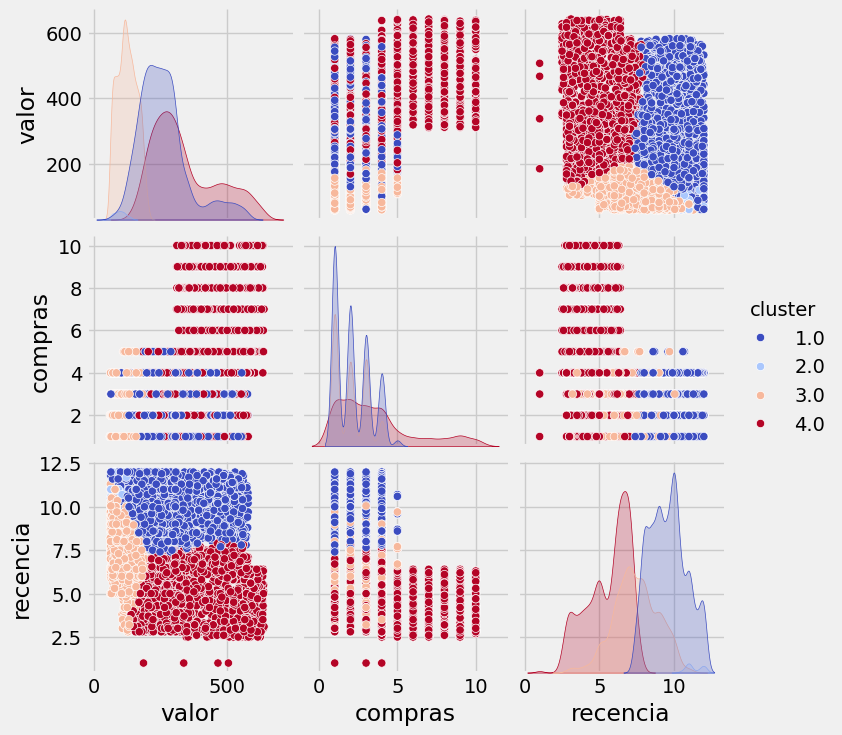

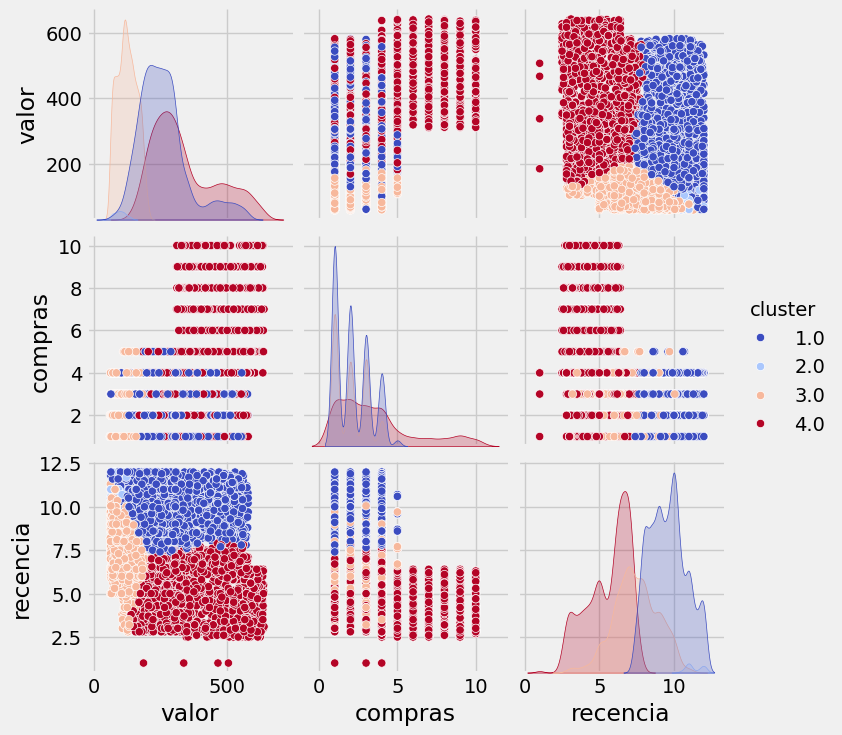

In [67]:
# Caracterização dos clusters
sns.pairplot(df_cluster,hue='cluster',palette='coolwarm')
plt.show()